# Pandas


Пакет для статистической обработки данных, по функциональности близкий к R.

In [1]:
import numpy as np
import pandas as pd

## Series

Одномерный набор данных. Отсутствующий данные записываются как `np.nan` (в этот день термометр сломался или метеоролог был пьян); они не участвуют в вычислении средних, среднеквадратичных отклонений и т.д.

In [2]:
l=[1,3,5,np.nan,6,8]
s=pd.Series(l)
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64


Основная информация о наборе данных: среднее, среднеквадратичное отклонение, минимум, максимум, медиана (которая отличается от среднего для несимметричных распределений).

In [3]:
s.describe()

count    5.000000
mean     4.600000
std      2.701851
min      1.000000
25%      3.000000
50%      5.000000
75%      6.000000
max      8.000000
dtype: float64

Обычная индексация.

In [4]:
s[2]

5.0

In [5]:
s[2]=7
s

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [6]:
s[2:5]

2    7.0
3    NaN
4    6.0
dtype: float64

In [7]:
s1=s[1:]
s1

1    3.0
2    7.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [8]:
s2=s[:-1]
s2

0    1.0
1    3.0
2    7.0
3    NaN
4    6.0
dtype: float64


В сумме `s1+s2` складываются данные с одинаковыми индексами. Поскольку в `s1` нет данного и индексом 0, а в `s2` - с индексом 5, в `s1+s2` в соответствующих позициях будет `NaN`.

In [9]:
s1+s2

0     NaN
1     6.0
2    14.0
3     NaN
4    12.0
5     NaN
dtype: float64


К наборам данных можно применять функции из `numpy`.

In [10]:
np.exp(s)

0       2.718282
1      20.085537
2    1096.633158
3            NaN
4     403.428793
5    2980.957987
dtype: float64

При создании набора данных s мы не указали, что будет играть роль индекса. По умолчанию это последовательность целых чисел 0, 1, 2, ...

In [11]:
s.index

RangeIndex(start=0, stop=6, step=1)


Но можно создавать наборы данных с индексом, заданным списком.

In [12]:
i=list('abcdef')
i

['a', 'b', 'c', 'd', 'e', 'f']

In [13]:
s=pd.Series(l,index=i)
s

a    1.0
b    3.0
c    5.0
d    NaN
e    6.0
f    8.0
dtype: float64

In [14]:
s['c']

5.0

Если индекс - строка, то вместо s['c'] можно писать s.c.

In [15]:
s.c

5.0

Набор данных можно создать из словаря.

In [16]:
s=pd.Series({'a':1,'b':2,'c':0})
s

a    1
b    2
c    0
dtype: int64


Можно отсортировать набор данных.

In [17]:
s.sort_values()

c    0
a    1
b    2
dtype: int64

Роль индекса может играть, скажем, последовательность дат (или времён измерения и т.д.).

In [18]:
d=pd.date_range('20160101',periods=10)
d

DatetimeIndex(['2016-01-01', '2016-01-02', '2016-01-03', '2016-01-04',
               '2016-01-05', '2016-01-06', '2016-01-07', '2016-01-08',
               '2016-01-09', '2016-01-10'],
              dtype='datetime64[ns]', freq='D')

In [19]:
s=pd.Series(np.random.normal(size=10),index=d)
s

2016-01-01   -1.707982
2016-01-02    0.120946
2016-01-03    0.768793
2016-01-04    0.315929
2016-01-05    0.379190
2016-01-06    1.394312
2016-01-07   -0.272020
2016-01-08   -0.353137
2016-01-09    0.226883
2016-01-10   -0.063782
Freq: D, dtype: float64

Операции сравнения возвращают наборы булевых данных.

In [20]:
s>0

2016-01-01    False
2016-01-02     True
2016-01-03     True
2016-01-04     True
2016-01-05     True
2016-01-06     True
2016-01-07    False
2016-01-08    False
2016-01-09     True
2016-01-10    False
Freq: D, dtype: bool

Если такой булев набор использовать для индексации, получится поднабор только из тех данных, для которых условие есть True.

In [21]:
s[s>0]

2016-01-02    0.120946
2016-01-03    0.768793
2016-01-04    0.315929
2016-01-05    0.379190
2016-01-06    1.394312
2016-01-09    0.226883
dtype: float64

Кумулятивные максимумы - от первого элемента до текущего.

In [22]:
s.cummax()

2016-01-01   -1.707982
2016-01-02    0.120946
2016-01-03    0.768793
2016-01-04    0.768793
2016-01-05    0.768793
2016-01-06    1.394312
2016-01-07    1.394312
2016-01-08    1.394312
2016-01-09    1.394312
2016-01-10    1.394312
Freq: D, dtype: float64


Кумулятивные суммы.

In [23]:
s=s.cumsum()
s

2016-01-01   -1.707982
2016-01-02   -1.587036
2016-01-03   -0.818243
2016-01-04   -0.502314
2016-01-05   -0.123124
2016-01-06    1.271188
2016-01-07    0.999168
2016-01-08    0.646031
2016-01-09    0.872914
2016-01-10    0.809132
Freq: D, dtype: float64


Построим график.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

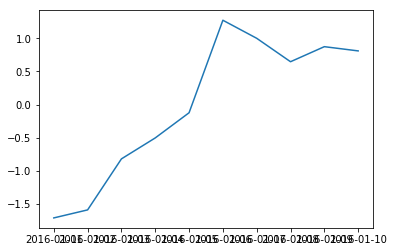

In [25]:
plt.plot(s)

## DataFrame

Двумерная таблица данных. Имеет индекс и набор столбцов (возможно, имеющих разные типы). Таблицу можно построить, например, из словаря, значениями в котором являются одномерные наборы данных.

In [60]:
d={'one':pd.Series([1,2,3],index=['a','b','c']),
   'two':pd.Series([1,2,3,4],index=['a','b','c','d'])}
df=pd.DataFrame(d)
df

,one,two
a,1.0,1
b,2.0,2
c,3.0,3
d,NaN,4


In [61]:
df.head(3)

,one,two
a,1.0,1
b,2.0,2
c,3.0,3


In [27]:
df.index

Index(['a', 'b', 'c', 'd'], dtype='object')

In [28]:
df.columns

Index(['one', 'two'], dtype='object')

Если в качестве индекса указать имя столбца, получится одномерный набор данных.

In [29]:
df['one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [30]:
df.one

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [31]:
df['one']['c']

3.0


Однако если указать диапазон индексов, то это означает диапазон строк. Причём последняя строка включается в таблицу.

In [32]:
df['b':'d']

,one,two
b,2.0,2
c,3.0,3
d,NaN,4



Диапазон целых чисел даёт диапазон строк с такими номерами, не включая последнюю строку (как обычно при индексировании списков). Всё это кажется довольно нелогичным.

In [33]:
df[1:3]

,one,two
b,2.0,2
c,3.0,3



Логичнее работает атрибут `loc`: первая позиция - всегда индекс строки, а вторая - столбца.

In [34]:
df.loc['b']

one    2.0
two    2.0
Name: b, dtype: float64

In [35]:
df.loc['b','one']

2.0

In [36]:
df.loc['a':'b','one']

a    1.0
b    2.0
Name: one, dtype: float64

In [37]:
df.loc['a':'b',:]

,one,two
a,1.0,1
b,2.0,2


In [38]:
df.loc[:,'one']

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

К таблице можно добавлять новые столбцы.

In [39]:
df['three']=df['one']*df['two']
df['flag']=df['two']>2
df

,one,two,three,flag
a,1.0,1,1.0,False
b,2.0,2,4.0,False
c,3.0,3,9.0,True
d,NaN,4,NaN,True


Также можно удалять имеющиеся.

In [40]:
del df['two']
df['foo']=0.
df

,one,three,flag,foo
a,1.0,1.0,False,0.0
b,2.0,4.0,False,0.0
c,3.0,9.0,True,0.0
d,NaN,NaN,True,0.0



Добавим копию столбца `one`, в которую входят только строки до второй.

In [41]:
df['one_tr']=df['one'][:2]
df

,one,three,flag,foo,one_tr
a,1.0,1.0,False,0.0,1.0
b,2.0,4.0,False,0.0,2.0
c,3.0,9.0,True,0.0,NaN
d,NaN,NaN,True,0.0,NaN


In [42]:
df=df.loc[:,['one','one_tr']]
df

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN


Можно объединять таблицы по вертикали и по горизонтали.

In [43]:
df2=pd.DataFrame({'one':{'e':0,'f':1},'one_tr':{'e':2}})
df2

,one,one_tr
e,0,2.0
f,1,NaN


In [44]:
pd.concat([df,df2])

,one,one_tr
a,1.0,1.0
b,2.0,2.0
c,3.0,NaN
d,NaN,NaN
e,0.0,2.0
f,1.0,NaN


In [45]:
df2=pd.DataFrame({'two':{'a':0,'b':1},'three':{'c':2,'d':3}})
df2

,three,two
a,NaN,0.0
b,NaN,1.0
c,2.0,NaN
d,3.0,NaN


In [46]:
pd.concat([df,df2],axis=1)

,one,one_tr,three,two
a,1.0,1.0,NaN,0.0
b,2.0,2.0,NaN,1.0
c,3.0,NaN,2.0,NaN
d,NaN,NaN,3.0,NaN



Создадим таблицу из массива случайных чисел.

In [47]:
df=pd.DataFrame(np.random.randn(10,4),
                columns=['A','B','C','D'])
df

,A,B,C,D
0,-1.795949,-1.647972,0.040533,-1.268764
1,-0.095721,0.261108,1.452193,1.913701
2,0.967443,0.171437,0.340324,1.179646
3,-1.985942,0.363671,0.861167,-0.515475
4,0.855165,1.001926,-0.981737,-1.398041
5,-2.229703,-0.332985,0.352474,-0.660368
6,-0.391953,1.365111,0.166725,0.091701
7,1.552107,0.086512,0.013053,-1.031451
8,1.607627,-1.094789,0.683363,-1.455686
9,0.734306,-0.280789,1.240049,-1.327759


In [48]:
df2=pd.DataFrame(np.random.randn(7,3),columns=['A','B','C'])
df+df2

,A,B,C,D
0,-2.494389,-1.771479,2.124375,NaN
1,-0.211997,0.771579,1.684445,NaN
2,1.999811,0.178963,0.952567,NaN
3,-2.478882,1.561773,-1.781497,NaN
4,0.741607,1.477073,-2.228210,NaN
5,-0.787397,0.468099,-1.587691,NaN
6,-1.162478,0.649261,0.230124,NaN
7,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN


In [49]:
2*df+3

,A,B,C,D
0,-0.591898,-0.295945,3.081066,0.462473
1,2.808558,3.522216,5.904387,6.827401
2,4.934885,3.342874,3.680648,5.359292
3,-0.971885,3.727343,4.722334,1.969050
4,4.710329,5.003851,1.036526,0.203918
5,-1.459406,2.334030,3.704949,1.679264
6,2.216094,5.730223,3.333449,3.183401
7,6.104214,3.173025,3.026105,0.937098
8,6.215254,0.810421,4.366726,0.088627
9,4.468612,2.438422,5.480097,0.344483


In [50]:
np.sin(df)

,A,B,C,D
0,-0.974760,-0.997023,0.040522,-0.954734
1,-0.095575,0.258151,0.992975,0.941782
2,0.823437,0.170598,0.333793,0.924471
3,-0.915057,0.355708,0.758603,-0.492948
4,0.754679,0.842510,-0.831464,-0.985115
5,-0.790662,-0.326866,0.345221,-0.613407
6,-0.381994,0.978921,0.165953,0.091572
7,0.999825,0.086405,0.013052,-0.858045
8,0.999322,-0.888832,0.631404,-0.993382
9,0.670072,-0.277114,0.945800,-0.970611


In [51]:
df.describe()

,A,B,C,D
count,10.000000,10.000000,10.000000,10.000000
mean,-0.078262,-0.010677,0.416814,-0.447250
std,1.469787,0.894902,0.695327,1.167801
min,-2.229703,-1.647972,-0.981737,-1.455686
25%,-1.444950,-0.319936,0.072081,-1.313010
50%,0.319292,0.128975,0.346399,-0.845909
75%,0.939373,0.338031,0.816716,-0.060093
max,1.607627,1.365111,1.452193,1.913701


In [52]:
df.sort_values(by='B')

,A,B,C,D
0,-1.795949,-1.647972,0.040533,-1.268764
8,1.607627,-1.094789,0.683363,-1.455686
5,-2.229703,-0.332985,0.352474,-0.660368
9,0.734306,-0.280789,1.240049,-1.327759
7,1.552107,0.086512,0.013053,-1.031451
2,0.967443,0.171437,0.340324,1.179646
1,-0.095721,0.261108,1.452193,1.913701
3,-1.985942,0.363671,0.861167,-0.515475
4,0.855165,1.001926,-0.981737,-1.398041
6,-0.391953,1.365111,0.166725,0.091701


Атрибут iloc подобен loc: первый индекс - номер строки, второй - номер столбца. Это целые числа, конец диапазона на включается (как обычно в питоне).

In [53]:
df.iloc[2]

A    0.967443
B    0.171437
C    0.340324
D    1.179646
Name: 2, dtype: float64

In [54]:
df.iloc[1:3]

,A,B,C,D
1,-0.095721,0.261108,1.452193,1.913701
2,0.967443,0.171437,0.340324,1.179646


In [55]:
df.iloc[1:3,0:2]

,A,B
1,-0.095721,0.261108
2,0.967443,0.171437


кумулятивные суммы

In [56]:
cs=df.cumsum()
cs

,A,B,C,D
0,-1.795949,-1.647972,0.040533,-1.268764
1,-1.891670,-1.386864,1.492726,0.644937
2,-0.924228,-1.215427,1.833050,1.824583
3,-2.910170,-0.851756,2.694217,1.309108
4,-2.055006,0.150170,1.712480,-0.088933
5,-4.284709,-0.182816,2.064955,-0.749301
6,-4.676662,1.182296,2.231679,-0.657600
7,-3.124555,1.268808,2.244732,-1.689051
8,-1.516928,0.174019,2.928095,-3.144737
9,-0.782622,-0.106770,4.168144,-4.472496


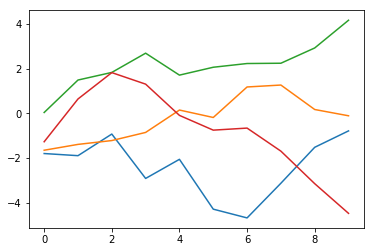

In [57]:
plt.plot(cs)

### Чтение из файла

Pandas умеет работать с файлами разных форматов, но чаще всего приходится открывать csv (comma separated value) или xls(x) файлы:

In [62]:
data = pd.read_excel('./excel.xlsx')
data.head() 

,Имя,Возраст,Пол
0,Саша,6,м
1,Ира,4,ж
2,Иван,7,м
3,Никита,9,м
4,Алена,5,ж


In [69]:
data = pd.read_csv('./csv_example_1.csv')
data.head() 

,Имя,Возраст,Пол
0,Саша,6,м
1,Ира,4,ж
2,Иван,7,м
3,Никита,9,м
4,Алена,5,ж


In [71]:
data = pd.read_csv('./csv_example_2.csv')
data.head() 

,Имя;Возраст;Пол
0,Саша;6;м
1,Ира;4;ж
2,Иван;7;м
3,Никита;9;м
4,Алена;5;ж


В файле разделителем вытсупает не запятая, а точка с запятой.

In [74]:
data = pd.read_csv('./csv_example_2.csv', sep=';')
data

,Имя,Возраст,Пол
0,Саша,6,м
1,Ира,4,ж
2,Иван,7,м
3,Никита,9,м
4,Алена,5,ж


In [75]:
data[data['Пол'] == 'ж']

,Имя,Возраст,Пол
1,Ира,4,ж
4,Алена,5,ж


In [76]:
data[data['Возраст'] > 5]

,Имя,Возраст,Пол
0,Саша,6,м
2,Иван,7,м
3,Никита,9,м


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1125b76d8>]],
      dtype=object)

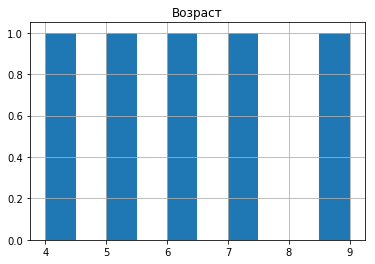

In [78]:
data.hist()

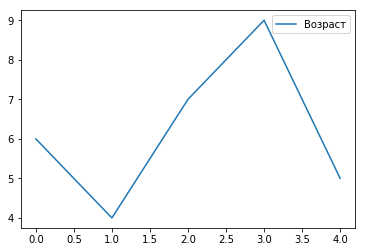

In [79]:
data.plot()

### Запись в файл

In [84]:
data.to_csv('data.csv', sep='@')

In [85]:
data1 = pd.read_csv('data.csv', sep='@')
data1

,Unnamed: 0,Имя,Возраст,Пол
0,0,Саша,6,м
1,1,Ира,4,ж
2,2,Иван,7,м
3,3,Никита,9,м
4,4,Алена,5,ж


In [86]:
data.to_csv('data.csv', sep='@', index=False)

In [88]:
data2 = pd.read_csv('data.csv', sep='@')
data2

,Имя,Возраст,Пол
0,Саша,6,м
1,Ира,4,ж
2,Иван,7,м
3,Никита,9,м
4,Алена,5,ж
